In [1]:
# 2019-5-25 Jared Wolf
# import statements
import matplotlib.pyplot as plt
import numpy as np
import json
import requests
import datetime
from datetime import datetime as DateTime, timedelta as TimeDelta

In [2]:
def datget(daystart, dayend):
    # Query the NOAA database for data gathered based on returned

    data = []

    # Open obs_loc.json to read available station parameters
    with open('obs_loc.json', 'r') as station:
        data.append(json.load(station))

    # API key
    key = 'xMXgKWPVVwcWAdKJKXHDzUuvnSFROLOE'

    # API base-level website
    cdat = 'https://www.ncdc.noaa.gov/cdo-web/api/v2'

    # Leave open ended for append
    stations = '/data?datasetid=GHCND&stationid='

    # Searches through open obs_loc.json doc, returns and appends station information to query
    for each in data:
        for line in each.get('results'):
            stations += line['id'] + '&'

    # Narrow search time-frame (start date & end date)
    stations += 'units=standard&startdate=' + daystart + '&enddate=' + dayend

    # Send API request
    response = requests.get(cdat + stations, headers={"Token": key})

    # Save response data to obs_data.json
    with open('obs_data.json', 'w') as fw:
        json.dump(response.json(), fw, indent=2)
    fw.close()
    #print(response.json())

In [3]:
# Query the NOAA database for observatory stations within params

# Open GST_data.json, read dates of geomagnetic storm events
with open('GST_data.json', 'r') as jsr:
    read = json.load(jsr)

# API key for ncdc.noaa.gov api
key = 'xMXgKWPVVwcWAdKJKXHDzUuvnSFROLOE'

# API base-level website
ncd = 'https://www.ncdc.noaa.gov/cdo-web/api/v2'

# Return stations between lat,long ('bottom left'), lat,long ('top right')
stations = '/stations?extent=75,-179,90,179'

# Narrow search window date
stations += '&startdate=2010-01-01'

# append string to narrow search to data with Global Historical Climate Network - Daily (GHCND)
stations += '&datasetid=GHCND'

response = requests.get(ncd + stations, headers={"Token": key})

with open('obs_loc.json', 'w') as fw:
    json.dump(response.json(), fw, indent=2)

In [4]:
# Query the Space Weather Database Of Notifications, Knowledge, Information (DONKI) for geomagnetic storm events

# website + date range parameters 
gst = 'https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/GST?startDate=2018-05-20'

# Save response data to GST_data.json file
response = requests.get(gst)
with open('GST_data.json', 'w') as fw:
    json.dump(response.json(), fw, indent=2)

In [5]:
def makeplot(x, y, titlex):
    plt.figure()
    plt.title('Event KP Index = ' + titlex)

    plt.xticks(rotation='vertical')
    plt.ylabel('Temp: Farenheight')
    plt.xlabel('Date GST Following Event')
    plt.plot(x,y, '--')

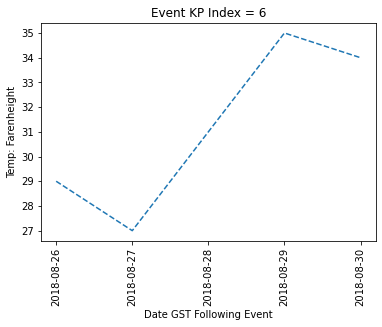

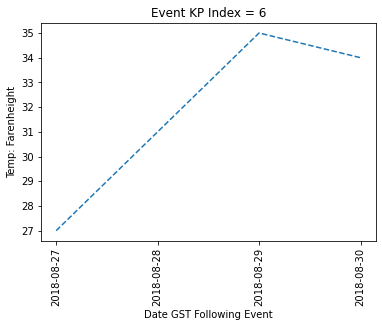

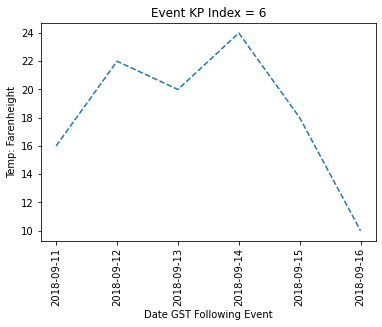

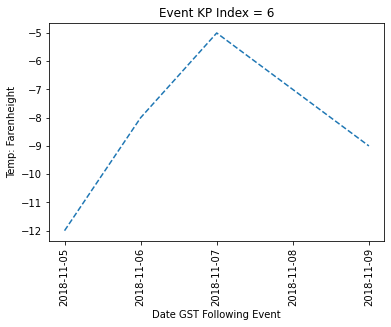

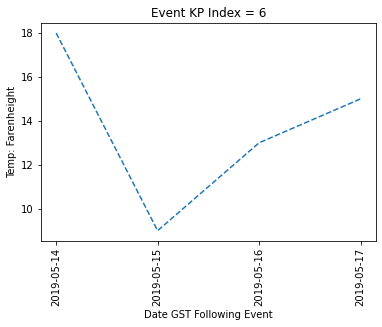

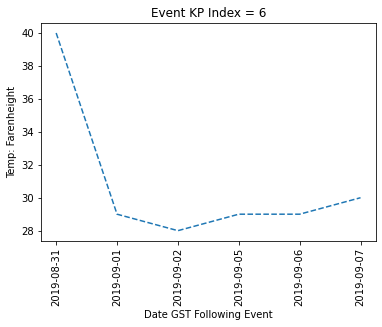

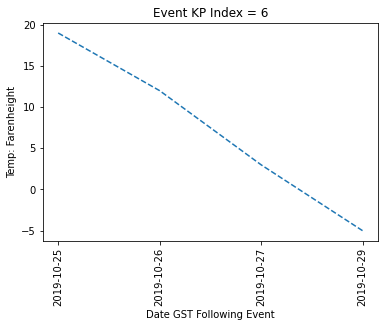

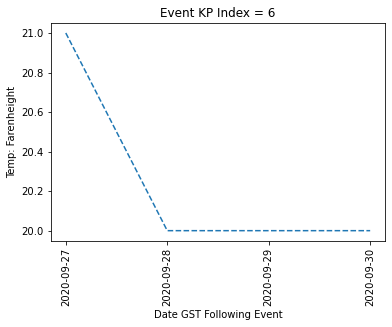

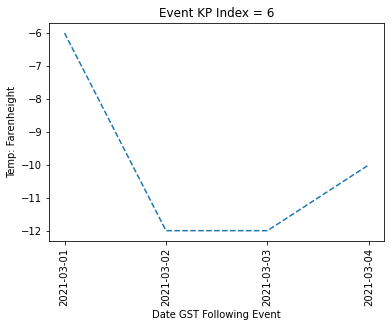

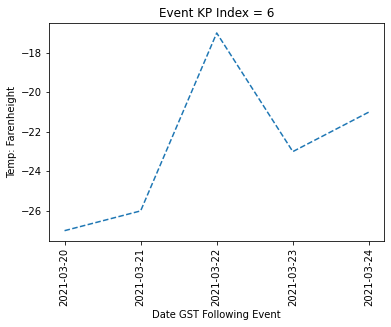

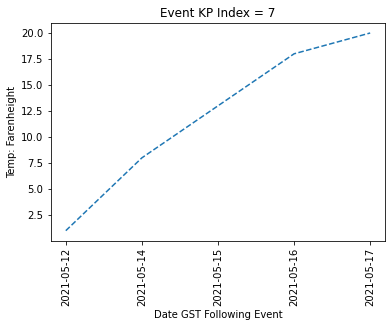

In [6]:
# Row in Read returns GST dates
temp = []
for row in read:
    isodate = (row.get('startTime')[:10])
    newdate = DateTime.fromisoformat(isodate) + TimeDelta(days=10)
    # Runs previous block with GST date as beginning date and gstdate+X days  as the end date
    datget(isodate , (str(newdate))[:10])
    #print('KP Index of event:', row.get('allKpIndex')[0]['kpIndex'])

    with open('obs_data.json', 'r') as tempinfo:
        temp.append(json.load(tempinfo))

    for element in temp:
        xdata = []
        ydata = []        
        for line in element.get('results'):    
            if line.get('datatype') == 'TAVG':
                xdata.append(line.get('date')[:10])
                ydata.append(line.get('value'))
            #print(each)#.get('value'))
    #print('^^^^ISODATE=' + isodate + '^^^^')
    #print(type(str(row.get('allKpIndex')[0]['kpIndex'])))
    makeplot(xdata, ydata, str(row.get('allKpIndex')[0]['kpIndex']))
        #print(xdata, ydata, str(row.get('allKpIndex')[0]['kpIndex']))